# The Monte Carlo method

The Monte Carlo method is a computational technique that uses <font color='teal'>random sampling</font> to estimate complex mathematical outcomes or solve problems that might be <font color='teal'>deterministic</font> in nature.

The name “Monte Carlo” for the Monte Carlo methods has an origin that ties back to the famous Monte Carlo Casino located in Monaco. This name was not chosen because of any direct association with the mathematical principles behind these methods, but rather for its metaphorical connection to randomness and chance, which are central elements in both gambling and Monte Carlo simulations.

## Monte Carlo integration

Let us consider the example of computing of an integral of a function. This is a deterministic problem, but we will solve it using random sampling.

**Problem to solve:** find value of the integral

$$\int_a^b f(x)dx. $$

Monte Carlo integration estimates this integral by finding the fraction of random points that fall below $f(x)$.

In the **Bayesian inference** context, we are usually interested in estimating <font color='teal'>expectations</font> (which are themselves point estimates):

$$ E[h(x)] = \int h(x)f(x)dx,$$

which can be done with

$$ \bar{h}_n = \frac{1}{n} \sum_i^n h(x_i),$$
where $x_i ∼ f$ is a draw from the density $f$.

**Exercise:** _Do you see how this is **sampling** to figure out a property?_

The convergence of Monte Carlo integration is $\mathcal{O}(n^{1/2})$ and is independent of the dimensionality. Hence, Monte Carlo integration **generally** beats numerical intergration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $0(n^d)$!

### Example

Estimate the integral $\int_0^1 e^x dx$ using Monte Carlo integration.

In [1]:
import random
import math
import numpy as np
import jax.numpy as jnp
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.patches as patches

1.7182817
        10 1.087313
       100 1.766883
      1000 1.731546
     10000 1.709255
    100000 1.722711
   1000000 1.718242
  10000000 1.718393
 100000000 1.718371


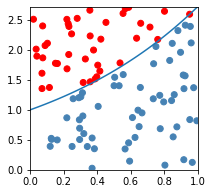

In [2]:
print(jnp.exp(1) - jnp.exp(0))

plt.figure(figsize=(3, 3))

x = jnp.linspace(0, 1, 100)
plt.plot(x, jnp.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= jnp.e

cols = ['steelblue'] * 100
for i in range(100):
    if pts[i,1] > jnp.exp(pts[i,0]):     # acceptance / rejection step
        cols[i] = 'red'


plt.scatter(pts[:, 0], pts[:, 1], c = cols)
plt.xlim([0,1])
plt.ylim([0, jnp.e]);

# Monte Carlo approximation

for n in 10**np.array([1, 2, 3, 4, 5, 6, 7, 8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= jnp.e
    count = jnp.sum(pts[:, 1] < jnp.exp(pts[:, 0]))
    volume = jnp.e * 1 # volume of region
    sol = (volume * count)/n
    print('%10d %.6f' % (n, sol))

### The Monte Carlo method - computing $\pi$

We can also use Monte Carlo to estimate the value of π!

In [3]:
#@title The Monte Carlo method - computing π

def in_circle(x, y, r):
    # is point (x,y) within circle of radius r?
    return jnp.sqrt(x **2 + y**2) <= r**2

def approx_pi(r, n):

    xs, ys, cols = [], [], []

    count = 0

    for i in range(n):
        x = np.random.uniform(0,r,1)
        y = np.random.uniform(0,r,1)
        xs.append(x)
        ys.append(y)

        if in_circle(x, y, r):
            count += 1
            cols.append("red")
        else:
            cols.append("steelblue")

    pi_appr = round(4 * count/n, 3)

    plt.figure(figsize=(2, 2))
    plt.scatter(xs, ys, c = cols, s=2)
    plt.title("pi (approximately) = " + str(pi_appr))
    plt.xticks([])
    plt.yticks([])
    plt.show()

    return pi_appr

**Group task Β14.**

Using the functions above, iterate $n$ through vaules $5*10^1, 5*10^2, 5*10^3$ and run the function approximating $\pi$. How does the result change?

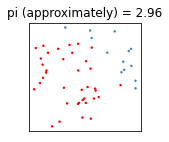

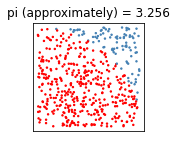

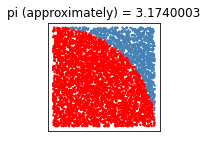

In [4]:
r = 1

for n in 5*10**jnp.array([1,2,3]):
    approx_pi(r, n)

## Buffon's needle problem

Here is another interesting example where random number generation can help us solve an analytical problem.

Buffon's Needle is a classic probability problem that involves randomly dropping a needle of a certain length onto a floor with parallel lines drawn at regular intervals. The goal is to estimate the probability that the needle will intersect one of the lines. The probability can be calculated using the following formula:

$$
P = \frac{2L}{\pi d}
$$

Where:

- $P$  is the estimated probability of the needle intersecting a line.
- $L$  is the length of the needle.
- $d$  is the distance between the lines on the floor

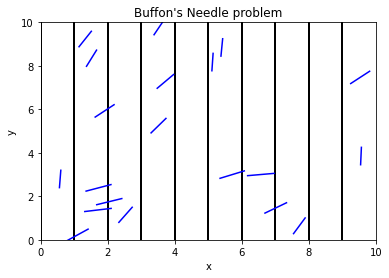

In [5]:
# Visualise Buffon's needle problem
num_lines = 10       # Number of parallel lines
line_spacing = 1.0  # Distance between lines
needle_length = 0.8 # Length of the needle
num_needles = 20   # Number of needles to drop

# Create a figure and axis for visualization
fig, ax = plt.subplots()

# Draw the parallel lines vertically
for i in range(num_lines):
    line_x = i * line_spacing
    ax.axvline(x=line_x, color='black', linewidth=2)

# Simulate dropping needles and visualize them
for _ in range(num_needles):
    # Randomly choose a midpoint and an angle for the needle
    mid_point_x = random.uniform(0, num_lines * line_spacing)
    mid_point_y = random.uniform(0, num_lines * line_spacing)
    angle = random.uniform(0, math.pi / 2)

    # Calculate the endpoints of the needle
    x0 = mid_point_x - (needle_length / 2) * math.cos(angle)
    x1 = mid_point_x + (needle_length / 2) * math.cos(angle)
    y0 = mid_point_y - (needle_length / 2) * math.sin(angle)
    y1 = mid_point_y + (needle_length / 2) * math.sin(angle)

    # Plot the needle as a line segment
    ax.plot([x0, x1], [y0, y1], color='blue')

# Set plot limits and labels
ax.set_xlim([0, num_lines * line_spacing])
ax.set_ylim([0, num_lines * line_spacing])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Buffon's Needle problem")

# Show the plot
plt.show()

Let's write Python code to simulate Buffon's Needle experiment and estimate the probability.

This code simulates the dropping of needles and calculates the estimated probability of the needle intersecting one of the lines. The more needles you drop, the closer the estimated probability will be to the actual value of $\frac{2L}{\pi d}$.

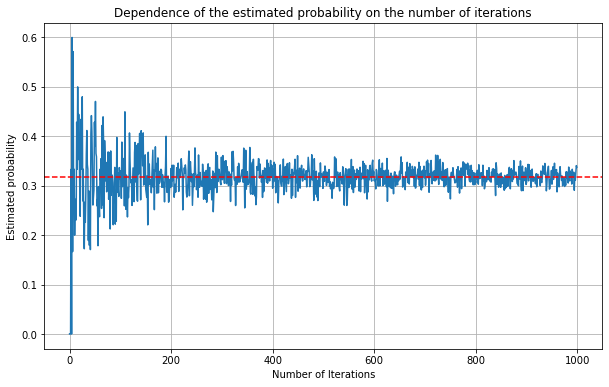

In [6]:
def buffon_needle_simulation(num_needles, needle_length, line_spacing):
    intersected = 0

    for _ in range(num_needles):
        # Generate a random angle between 0 and 180 degrees (in radians)
        angle = random.uniform(0, math.pi / 2)

        # Generate a random position for the midpoint of the needle
        mid_point = random.uniform(0, line_spacing / 2)

        # Check if the needle intersects a line
        if mid_point <= (needle_length / 2) * math.sin(angle):
            intersected += 1

    # Estimate the probability
    if intersected == 0:
        estimated_probability = 0
    else:
        estimated_probability = intersected / num_needles

    return estimated_probability

def compute_true_value(needle_length, line_spacing):
    true_value = (2 * needle_length) / (math.pi * line_spacing)
    return true_value


# Input parameters
needle_length = 1.0      # Length of the needle
line_spacing = 2.0       # Distance between the lines
max_num_needles = 1000   # maximum number of needles to drop 

estimates = []

for num_needles in range(max_num_needles):
    estimated_probability = buffon_needle_simulation(num_needles, needle_length, line_spacing)
    estimates.append(estimated_probability)

# Compute the true value
true_value = compute_true_value(needle_length, line_spacing)


# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(max_num_needles), estimates)
plt.xlabel('Number of Iterations')
plt.ylabel('Estimated probability')
plt.axhline(y=true_value, color='red', linestyle='--', label='True Value')
plt.title('Dependence of the estimated probability on the number of iterations')
plt.grid(True)

# Show the plot
plt.show()

You can read more on the analytical solution of the version of this problem over a grid [here](https://mathworld.wolfram.com/Buffon-LaplaceNeedleProblem.html).

### Monte Carlo Tree Search

Monte Carlo Tree Search (MCTS) is a heuristic search algorithm used mainly in decision processes involving uncertainty and in particular in games. It's a popular algorithm for game-playing AI, especially in environments where the full breadth of possible moves can't be exhaustively explored due to computational constraints. Some remarkable recent applications of MCTS are [AlphaGo](https://blog.research.google/2016/01/alphago-mastering-ancient-game-of-go.html) and [AlphaZero](https://arxiv.org/pdf/1712.01815.pdf), where MCTS is combined with neural networks to determine the best next action.

Here's a simplified explanation of how MCTS works:

- **Selection**: Starting from the root node (current game state), the algorithm traverses down the tree to select a node. This selection is typically done based on a trade-off between exploration (trying less visited nodes) and exploitation (choosing nodes with higher estimated value).

- **Expansion**: Once a node is selected, if it has unexplored moves or children, one of these moves is chosen, and a new node is added to the tree representing the state resulting from that move.

- **Simulation (Rollout)**: From the newly expanded node, a simulated game is played out until a result is achieved (win, lose, draw). This simulation usually involves randomly selecting moves until the game reaches a terminal state.

- **Backpropagation**: The result of the simulated game is backpropagated up the tree. The statistics of the nodes visited during the selection and expansion steps are updated accordingly, reflecting the outcome of the simulated game.

By repeatedly executing these steps, the MCTS algorithm builds a search tree where nodes represent game states and edges represent possible moves. Over time, the algorithm focuses more on promising moves based on the outcomes of simulated games, converging towards better decisions.

MCTS has been successfully applied in various games, including Go, chess, and many others. It's particularly useful in games with large branching factors and complex decision trees, where traditional minimax-based algorithms struggle due to the vast search space.

Here's a simplified Python implementation of Monte Carlo Tree Search (MCTS) for a simple game like Tic-Tac-Toe:

